## Parameter Estimation: MLE and MAP

In [59]:
# import necessary libraries
import numpy as np
# import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
from scipy.stats import beta as sciBeta

Read the dataset into `elems` array

In [17]:
f=open("./data/parameter_estimation_dataset.txt","r")
elems=[]
for line in f:
    elems.append(int(line.strip()))

[38,
 10,
 9,
 11,
 30,
 7,
 7,
 2,
 4,
 13,
 12,
 11,
 3,
 25,
 10,
 5,
 34,
 1,
 10,
 1,
 4,
 24,
 1,
 3,
 17,
 41,
 4,
 17,
 6,
 7,
 2,
 10,
 1,
 13,
 19,
 2,
 19,
 6,
 9,
 3,
 6,
 17,
 15,
 1,
 31,
 16,
 23,
 33,
 2,
 19,
 3,
 8,
 10,
 3,
 18,
 8,
 1,
 6,
 8,
 4,
 12,
 1,
 17,
 43,
 14,
 2,
 32,
 7,
 10,
 5,
 13,
 19,
 42,
 8,
 5,
 2,
 25,
 44,
 13,
 2,
 23,
 9,
 13,
 31,
 8,
 10,
 22,
 8,
 2,
 5,
 6,
 19,
 11,
 2,
 12,
 13,
 4,
 19,
 16,
 8,
 15,
 4,
 6,
 18,
 6,
 13,
 10,
 13,
 41,
 16,
 4,
 25,
 15,
 51,
 2,
 54,
 1,
 9,
 6,
 3,
 25,
 6,
 10,
 22,
 41,
 16,
 1,
 1,
 5,
 21,
 1,
 9,
 10,
 19,
 13,
 4,
 1,
 30,
 17,
 6,
 2,
 1,
 7,
 35,
 18,
 1,
 6,
 16,
 19,
 3,
 38,
 1,
 11,
 10,
 2,
 24,
 1,
 3,
 7,
 4,
 36,
 14,
 4,
 3,
 8,
 19,
 4,
 1,
 2,
 16,
 3,
 4,
 31,
 20,
 35,
 12,
 1,
 3,
 14,
 6,
 3,
 44,
 7,
 5,
 5,
 7,
 5,
 5,
 2,
 7,
 2,
 24,
 23,
 6,
 13,
 20,
 8,
 3,
 11,
 1,
 1,
 9,
 2,
 28,
 27,
 35,
 2,
 2,
 4,
 5,
 4,
 20,
 7,
 4,
 9,
 28,
 11,
 12,
 21,
 10,
 4,
 5,
 11,
 1

Visualize data to see if it follows Geometric distribution.<br>
Plot the histogram of `elems` for the `bins`=[0, 5, 10, 20, 30, 40, 50, 60, 100]

Ellipsis

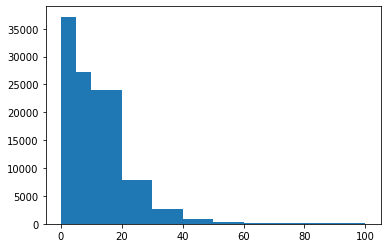

In [23]:
# Plot histogram of elems for the given bins parameter values
bins=[0, 5, 10, 20, 30, 40, 50, 60, 100]
plt.hist(elems,bins)

#### 1. (8 pts) Maximum Likelihood Estimation

i. (4 pts) We will compute an approximation of the MLE, by just computing the maximum of the log-likelihood function over a given finite set of candidate parameters. Write a function `plotMLE(X, theta)` that takes as input a set of samples, and a set of candidate parameters $\theta$, and produces a plot with the log-likelihood function $\ell(\theta)$ on the Y-axis, candidate parameters $\theta$ on the X-axis, and also mark that candidate parameter $\hat{\theta}$ from the given set of candidate parameters with the maximum log-likelihood (as the approximate MLE).

In [70]:
def plotMLE(X,theta):

    num_of_seq = len(X)  # number of elements in elems
    sum_of_seq = sum(X)  # sum of the elems

    log_likelihood = [sum([math.log(((1-theta_each)**(x-1))*theta_each) for x in X]) for theta_each in theta ] # compute log-likelihood wrt each theta. It will be an array.
    
    mle = max(log_likelihood) # find the max of log_likelihood. This will be our mle estimate
    mle_index = np.argsort(log_likelihood)[-1] # find the index for which we have mle estimate. 

    X = theta[mle_index] # select the best theta based on mle_index and store it in variable X
    
    # plotting
    plt.plot(theta,   log_likelihood,X,mle,'ro',label='mle')
    plt.text(X, mle, r'$\ theta={},mle={}$'.format(X, mle))
    plt.xlabel('Theta ')
    plt.ylabel('Log Likelihood values')
    plt.title('PlotMLE graph')
    plt.show()

ii.  (4 pts) Consider the following sequence of $100000$ samples (stored in `parameter_estimation_dataset.txt`) obtained from Casino Coruscant on number of trials to first win on a slot machine.<br>
    Use your program to produce three plots: (a) with the first ten samples, (b) with the first ten-thousand, and (c) with all hundred-thousand. For each of the three plots, for the set of candidate parameters use ${0.01, 0.02,\ldots,0.99}$. What do you observe from the resulting plots? Does the estimate change across the three plots? If yes, what is its trend?

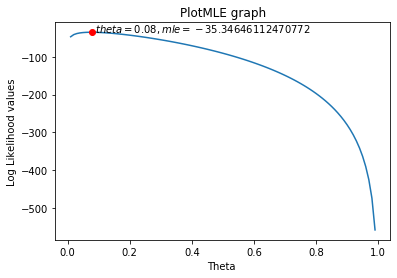

In [71]:
# call plotMLE for first ten elems
plotMLE(elems[:10], theta=np.arange(0.01,1,0.01))

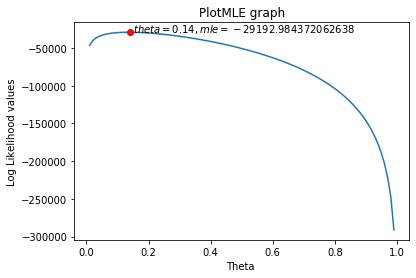

In [44]:
# call plotMLE for first ten-thousand elems for theta = arange(0.01,1,0.01)
plotMLE(elems[:10000], theta=np.arange(0.01,1,0.01))

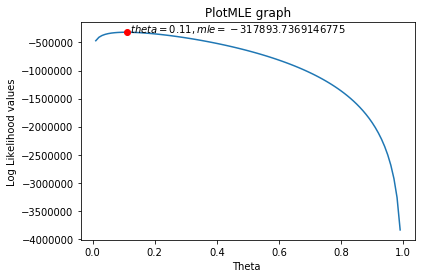

In [45]:
# call plotMLE for all elems for theta = arange(0.01,1,0.01)
plotMLE(elems, theta=np.arange(0.01,1,0.01))

#### 2. (12 pts) Maximum a Posteriori Estimation

i. (6 pts) Write a function `plotMAP(X,theta,alpha,beta)` that that takes as input a set of samples, and a set of candidate parameters $\theta$, a value for alpha, and a value for beta, and produces a plot with the log-posterior function $\ell(\theta)$ on the Y-axis, candidate parameters $\theta$ on the X-axis, and also mark that candidate parameter $\hat{\theta}$ from the given set of candidate parameters which has the maximum posterior density (as the approximate MAP). [Note : Use Beta distribution for prior.
    $$
    	Beta(x;\alpha, \beta) = \frac{x^{\alpha - 1} (1-x)^{\beta - 1}}{B(\alpha, \beta)}
    $$, where $B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$ and $\alpha > 0, \beta > 0$.]

In [72]:
def plotMAP(X,theta,alpha,beta):
    num_of_seq = len(X)  # number of elements in elems
    sum_of_seq = sum(X)  # sum of the elems
    
    prior = [sciBeta.pdf(theta_each,alpha,beta) for theta_each in theta]  # Hint: You can use scipy.stats.beta for computing the prior
    log_posteriori = [sum([math.log(sciBeta.pdf(theta_each,1+alpha,beta+x-1)) for x in X]) for theta_each in theta ]  # compute the log posteriori
    
    MAP = max(log_posteriori)  # find the max of log_posteriori. This will be our map estimate
    map_index = np.argsort(log_posteriori)[-1] # find the index for which we have map estimate. 

    X = theta[map_index] # select the best theta based on map_index and store it in variable X
    
    # plotting
    plt.plot(theta, log_posteriori,X,MAP,'ro',label='map')
    plt.text(X, MAP, r'$\ theta={},map={}$'.format(X, MAP))
    plt.xlabel('Theta ')
    plt.ylabel('Log Posteriori values')
    plt.title('PlotMAP graph')
    plt.show()

ii. (4 pts) Redo the three plots you made in the previous part, but with the log-posterior function instead, and mark the MAP estimators.  Set $\alpha = 2$, $\beta = 2$.

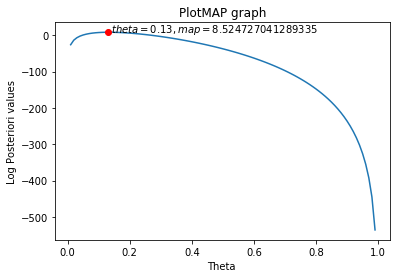

In [73]:
# call plotMAP for first 10 elems for theta=(0.01,1,0.01), and approriate prior parameters
alpha=2
beta=2
theta=np.arange(0.01,1,0.01)
plotMAP(elems[:10],theta,alpha,beta)

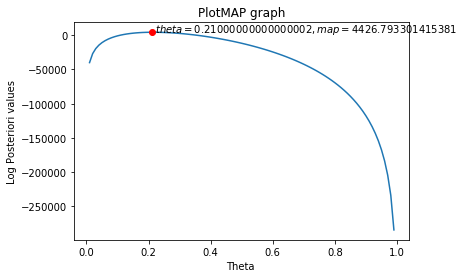

In [74]:
# call plotMAP for first ten thousand elems for theta=(0.01,1,0.01), and approriate prior parameters
plotMAP(elems[:10000],theta,alpha,beta)

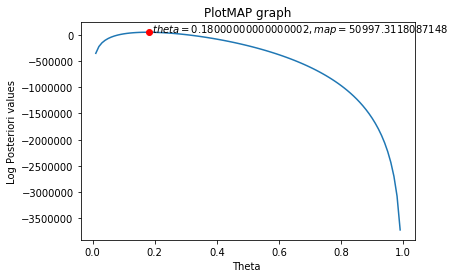

In [75]:
# call plotMAP for all elems for theta=(0.01,1,0.01), and approriate prior parameters
plotMAP(elems,theta,alpha,beta)

iii. (2 pts) Do you see any significant differences between the MLE and MAP estimates? Why or why not? Explain in 1-2 sentences.

No. There isn't any significant differences between them, but theta of MAP is a bit larger than MLE 
Their difference depends on p(theta), which is the prior. The prior keep increasing but don't change a lot after theta>0.2, so MAP is a bit larger than MLE.

In [83]:
# prior = [sciBeta.pdf(theta_each,2,2) for theta_each in theta]
for i in zip(theta[:40],prior[:40]):
    print("Theta: {}, Prior: {}".format(round(i[0],2),round(i[1],2)))

Theta: 0.01, Prior: 0.06
Theta: 0.02, Prior: 0.12
Theta: 0.03, Prior: 0.17
Theta: 0.04, Prior: 0.23
Theta: 0.05, Prior: 0.29
Theta: 0.06, Prior: 0.34
Theta: 0.07, Prior: 0.39
Theta: 0.08, Prior: 0.44
Theta: 0.09, Prior: 0.49
Theta: 0.1, Prior: 0.54
Theta: 0.11, Prior: 0.59
Theta: 0.12, Prior: 0.63
Theta: 0.13, Prior: 0.68
Theta: 0.14, Prior: 0.72
Theta: 0.15, Prior: 0.77
Theta: 0.16, Prior: 0.81
Theta: 0.17, Prior: 0.85
Theta: 0.18, Prior: 0.89
Theta: 0.19, Prior: 0.92
Theta: 0.2, Prior: 0.96
Theta: 0.21, Prior: 1.0
Theta: 0.22, Prior: 1.03
Theta: 0.23, Prior: 1.06
Theta: 0.24, Prior: 1.09
Theta: 0.25, Prior: 1.12
Theta: 0.26, Prior: 1.15
Theta: 0.27, Prior: 1.18
Theta: 0.28, Prior: 1.21
Theta: 0.29, Prior: 1.24
Theta: 0.3, Prior: 1.26
Theta: 0.31, Prior: 1.28
Theta: 0.32, Prior: 1.31
Theta: 0.33, Prior: 1.33
Theta: 0.34, Prior: 1.35
Theta: 0.35, Prior: 1.36
Theta: 0.36, Prior: 1.38
Theta: 0.37, Prior: 1.4
Theta: 0.38, Prior: 1.41
Theta: 0.39, Prior: 1.43
Theta: 0.4, Prior: 1.44
